In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- getting rid of names column cause it is of no use in predicting survival

In [4]:
df = data.drop(['Name', 'PassengerId'], axis=1)

In [5]:
df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,0,2,male,27.0,0,0,211536,13.00,NaN,S
887,1,1,female,19.0,0,0,112053,30.00,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,1,1,male,26.0,0,0,111369,30.00,C148,C
890,0,3,male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

**The goal is to identify every single pattern in the dataset. You should know each row inside out**

Survived
0    549
1    342
Name: count, dtype: int64


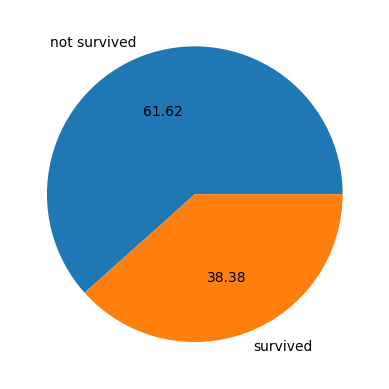

In [9]:
print(df.Survived.value_counts())
plt.pie(df.Survived.value_counts(), labels=['not survived', 'survived'], autopct='%.2f')
plt.show()

# Variabel Notes
- pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.

In [10]:
#num_cols = df.select_dtypes(exclude='object')

#sns.pairplot(data=num_cols, hue='Survived')
#plt.show()

- I came to know that the cabins in first letter shows the **Compartments** of the titanic.
- If you research about how titanic sank? You will come to know that the titanic had 16 water tight compartments/cabin. It was unsinkable unless the water reached more than 4 compartments and that's what exactly happend. The impact made holes in 5 comparmemts and water flowed through all of them making the ship dip a lot in the front side.
- Now we can conclude that the people who were in `Cabin` **'A','B','C','D'** and **'E'** were way more prone to death than any other cabins.
- The data in the `Cabin` column contains Compartment letter and cabin no.
- From this data I will make a new feature Compartment which will contain only the first letter from the `Cabin` feature i.e., this column will show the `Compartment` of the passenger.

In [11]:
df = df.drop('Ticket', axis=1)

In [12]:
df['Cabin'] = df['Cabin'].str[0]

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# Feature Engineering `Age`

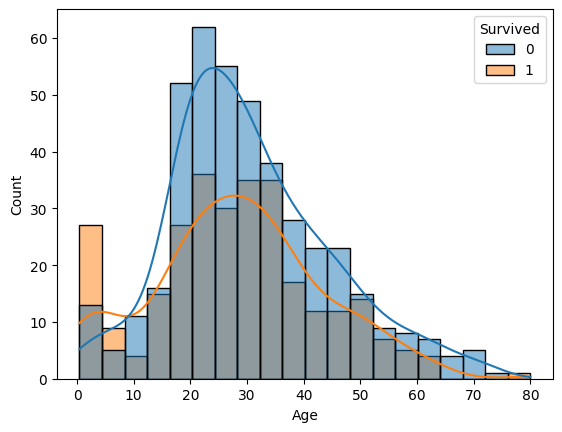

In [14]:
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True,)
plt.show()

In [15]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']

# Cut the Age column into bins
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate survival percentages for each age group
survival_percentage = df.groupby('AgeGroup')['Survived'].mean().round(4) * 100

# Print the survival percentages
for age_group, percentage in survival_percentage.items():
    print(f'Survival percentage for age group {age_group}: {percentage}%')


Survival percentage for age group 0-10: 61.29%
Survival percentage for age group 10-20: 40.2%
Survival percentage for age group 20-30: 35.0%
Survival percentage for age group 30-40: 43.71%
Survival percentage for age group 40-50: 38.2%
Survival percentage for age group 50-60: 41.67%
Survival percentage for age group 60-70: 31.580000000000002%
Survival percentage for age group 70-80: 0.0%


In [16]:
survival_percentage_dict = dict(survival_percentage)
df['AgeSurvivalRate'] = df['AgeGroup'].map(survival_percentage_dict)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,AgeSurvivalRate
0,0,3,male,22.0,1,0,7.2500,NaN,S,20-30,35.00
1,1,1,female,38.0,1,0,71.2833,C,C,30-40,43.71
2,1,3,female,26.0,0,0,7.9250,NaN,S,20-30,35.00
3,1,1,female,35.0,1,0,53.1000,C,S,30-40,43.71
4,0,3,male,35.0,0,0,8.0500,NaN,S,30-40,43.71


<Axes: >

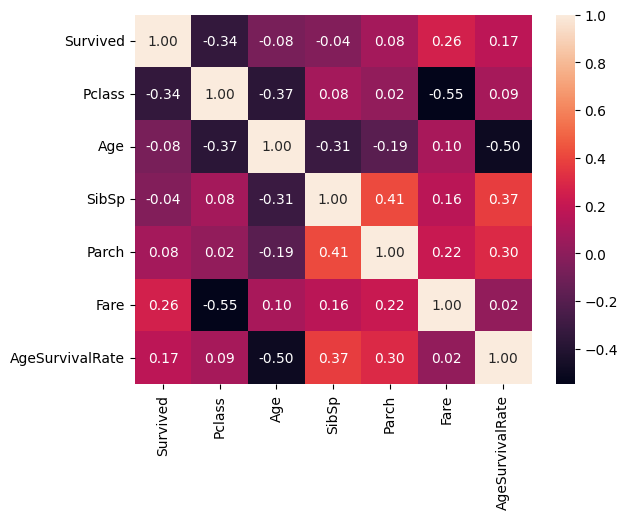

In [17]:
nums = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeSurvivalRate']]

sns.heatmap(nums.corr(), annot=True, fmt='.2f')

In [18]:
#df = df.drop('Age', axis=1)

# Building pipeline 

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [20]:
df.AgeSurvivalRate = df.AgeSurvivalRate.apply(pd.to_numeric)

In [21]:
numerical_features = ['Age','Pclass', 'SibSp', 'Parch', 'Fare', 'AgeSurvivalRate']
categorical_features = ['Sex', 'Cabin', 'Embarked']
target = ['Survived']

In [22]:
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

In [23]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Model Building

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [26]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=5))
])

In [27]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Pclass', 'SibSp',
                                                   'Parch', 'Fare',
                                                   'AgeSurvivalRate']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Cabin',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [28]:
accuracy_score(y_test, pipeline.predict(X_test))

0.8491620111731844

In [29]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Pclass', 'SibSp',
                                                   'Parch', 'Fare',
                                                   'AgeSurvivalRate']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Cabin',
                                                   'Embarked'])])),
                ('classifier', RandomForestClassifier(max_depth=5))])

In [30]:
import pickle 

with open('model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# Testing

In [31]:
test = pd.read_csv('test.csv')

In [32]:
df2 = test.drop(['PassengerId', 'Ticket', 'Name'], axis=1)
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S
2,2,male,62.0,0,0,9.6875,NaN,Q
3,3,male,27.0,0,0,8.6625,NaN,S
4,3,female,22.0,1,1,12.2875,NaN,S


In [33]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80']


df2['AgeGroup'] = pd.cut(df2['Age'], bins=age_bins, labels=age_labels, right=False)
df2['AgeSurvivalRate'] = df2['AgeGroup'].map(survival_percentage_dict)

In [34]:
df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,AgeSurvivalRate
0,3,male,34.5,0,0,7.8292,NaN,Q,30-40,43.71
1,3,female,47.0,1,0,7.0000,NaN,S,40-50,38.20
2,2,male,62.0,0,0,9.6875,NaN,Q,60-70,31.58
3,3,male,27.0,0,0,8.6625,NaN,S,20-30,35.00
4,3,female,22.0,1,1,12.2875,NaN,S,20-30,35.00


In [35]:
df2.Cabin = df2.Cabin.str[0]

In [36]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,AgeSurvivalRate
57,3,male,28.5,0,0,7.2292,NaN,C,20-30,35.0
717,2,female,27.0,0,0,10.5000,E,S,20-30,35.0
431,3,female,NaN,1,0,16.1000,NaN,S,NaN,NaN
633,1,male,NaN,0,0,0.0000,NaN,S,NaN,NaN
163,3,male,17.0,0,0,8.6625,NaN,S,10-20,40.2


In [37]:
X_test = df2
X_test.tail()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,AgeGroup,AgeSurvivalRate
413,3,male,NaN,0,0,8.0500,NaN,S,NaN,NaN
414,1,female,39.0,0,0,108.9000,C,C,30-40,43.71
415,3,male,38.5,0,0,7.2500,NaN,S,30-40,43.71
416,3,male,NaN,0,0,8.0500,NaN,S,NaN,NaN
417,3,male,NaN,1,1,22.3583,NaN,C,NaN,NaN


In [38]:
y_pred = pipeline.predict(X_test)

In [39]:
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})

In [40]:
submission.to_csv('submission.csv', index=False)